In [24]:
import pandas as pd
import numpy as np
import textblob as tb
from textblob import TextBlob
import nltk 
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from os import path
from wordcloud import WordCloud
!chcp 65001

Active code page: 65001


In [28]:
sentiments=pd.read_csv('C:/Users/ARPIT/Desktop/arpit/sentiment_analysis.csv')

In [29]:
print (sentiments['Review'].head())
sentiments.columns.values

0    - 4 LTE Network does not work, only Edge netwo...
1    - Always it has looked like to me a good telep...
2    - at the 1st day the screen turned off (bright...
3    - Faster than the old phone.- Easy touch.- Lou...
4    ' Happy camper after the original lower spec v...
Name: Review, dtype: object


array(['Review'], dtype=object)

In [20]:
!chcp 65001

    


Active code page: 65001


In [32]:
reviews=sentiments.loc[:]['Review']
new={}
j=1

stop_words=set(stopwords.words('english'))
for i in reviews:
    join=''
    
    new[j]=re.sub(r'[^\x00-\x7F-\)\(#!@*&%0-9,\.\'\\\"`=+]+','',i)
    split=new[j].split(' ')
    
    for x in split:
        if x.lower() not in (stop_words):
            join+=' '+x
    new[j]=join
    j+=1


positive={}
negative={}
neutral={}


for i in  new.keys():
    b=TextBlob(str(new[i]))
    if b.sentiment.polarity > 0:
        positive[i]=b.sentiment.polarity
    elif b.sentiment.polarity ==0 :
        neutral[i]=b.sentiment.polarity
    else:
        negative[i]=b.sentiment.polarity
    


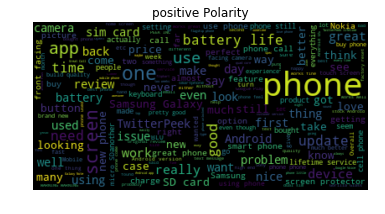

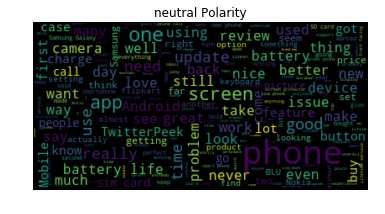

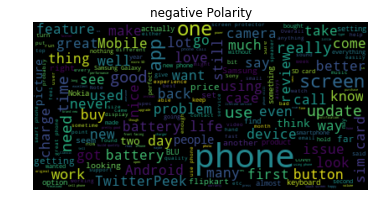

In [61]:
sentiments=['positive','neutral','negative']
data=[positive,negative,neutral]
index=0
for i in sentiments:
    filename=i+'.txt'
    with open(filename,'a') as n:
        for j in range(1,len(new)):
            if j in data[0].keys():
                n.write(new[j])
        
    index+=1
for i in sentiments:   
    wordcloud = WordCloud(max_font_size=40).generate(open(i+'.txt').read())
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(i+' Polarity')
    plt.show()
            
# with open('negative.txt','a') as n:
#     for i in range(1,len(new)):
#         if i in negative.keys():
#             n.write(new[i])
            
# with open('positive.txt','a') as n:
#     for i in range(1,len(new)):
#         if i in positive.keys():
#             n.write(new[i])
    